## Intro

We aim to analyse the traffic accidents dataset to identify the number of accidents on an hourly, daily, monthly, and yearly basis. We will also identify the months with the highest number of accidents and pinpoint the specific days within those months that experience the most accidents.

## Step 1. Read & Inspect the DataFrame

In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Suppress warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/traffic-accidents/traffic_accidents.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

## Step 2. Perform Data Cleaning

The data seems to be clean, with consistent non-null counts across all columns and data types correctly formatted, except for the crash date. 

To continue with the analysis, let's convert the crash date to a datetime format to extract the crash year and the day of week and month with the names for better readability on the graph. Let's also replace the crash day of the week so that when we sort the values, the week starts with Monday instead of Sunday.

In [53]:
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['crash_year'] = df['crash_date'].dt.year
df['crash_day_of_week'] = df['crash_date'].dt.dayofweek
df['crash_day_of_week_name'] = df['crash_date'].dt.day_name()
df['crash_month_name'] = df['crash_date'].dt.month_name()
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_year,crash_day_of_week_name,crash_month_name
0,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,3.0,13,5,7,2023,Saturday,July
1,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,2.0,0,6,8,2023,Sunday,August
2,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,3.0,10,3,12,2021,Thursday,December
3,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,0.0,5.0,0.0,0.0,19,2,8,2023,Wednesday,August
4,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,3.0,14,5,8,2023,Saturday,August


## Step 3. Analyse Yearly Accidents

Let's take a look at the range of years in the dataset.

In [54]:
print(f"Minimum year: {min(df['crash_year'])}\nMaximum year: {max(df['crash_year'])}" )

Minimum year: 2013
Maximum year: 2025


Now that we have the crash year, we can calculate the number of accidents that occurred each year using value_counts. To sort the results by year, we can use sort_index.

In [55]:
yearly_accidents = df['crash_year'].value_counts().sort_index()
yearly_accidents

crash_year
2013        2
2015     1917
2016     7615
2017    17655
2018    27438
2019    27959
2020    22784
2021    25689
2022    25543
2023    25454
2024    26214
2025     1036
Name: count, dtype: int64

There is a gap between the years, with a jump from 2013 to 2015. The years after 2015 are consecutive. To clearly display the years on the graph, we will exclude 2013, as it only had two accidents. This omission will not significantly affect the analysis and 2013 appears to be an outlier.

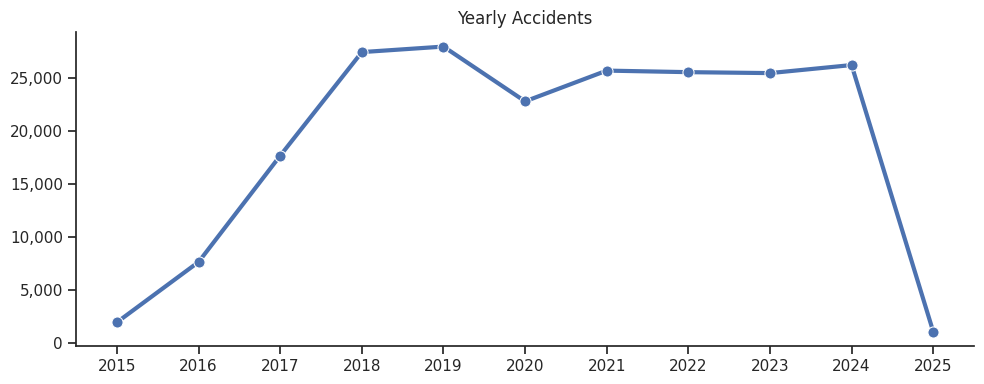

In [56]:
yearly_accidents.drop(2013, inplace=True)

fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style='ticks')
sns.despine()
sns.lineplot(data=yearly_accidents, x=yearly_accidents.index, y=yearly_accidents, linewidth=3, marker='o', markersize=8)
ax.set_title('Yearly Accidents')
ax.set_ylabel('')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.set_xticks(yearly_accidents.index)

plt.tight_layout()

Since 2015, the yearly number of accidents has been increasing, with a notable surge in 2018. There was a slight decrease in 2020, likely due to the impact of COVID-19, but it has been rising again since 2021. As we are still in the early stages of 2025, the number of accidents is low due to the lack of full year data.

## Step 4. Daily Accidents

Now that we've got the yearly accidents, let's see the number of accidents per day. We want to counts the occurrence of each unique value in **crash_day_of_week_name**, using value_counts and reset the index converting it to a DataFrame. We then want to merge the value counts result with the original DataFrame to bring in the values from **crash_day_of_week**. We will use this column to sort the values, and once the sorting is done, we will drop the column as it is no longer needed.

In [57]:
daily_accidents = df['crash_day_of_week_name'].value_counts().reset_index()
daily_accidents_merge = pd.merge(daily_accidents, df[['crash_day_of_week_name', 'crash_day_of_week']].drop_duplicates())
sorted_daily_accidents = daily_accidents_merge.sort_values(by='crash_day_of_week')
sorted_daily_accidents.drop(columns=['crash_day_of_week'], inplace=True)

sorted_daily_accidents

,crash_day_of_week_name,count
5,Monday,27938
4,Tuesday,30074
3,Wednesday,30093
1,Thursday,30787
0,Friday,34458
2,Saturday,30710
6,Sunday,25246


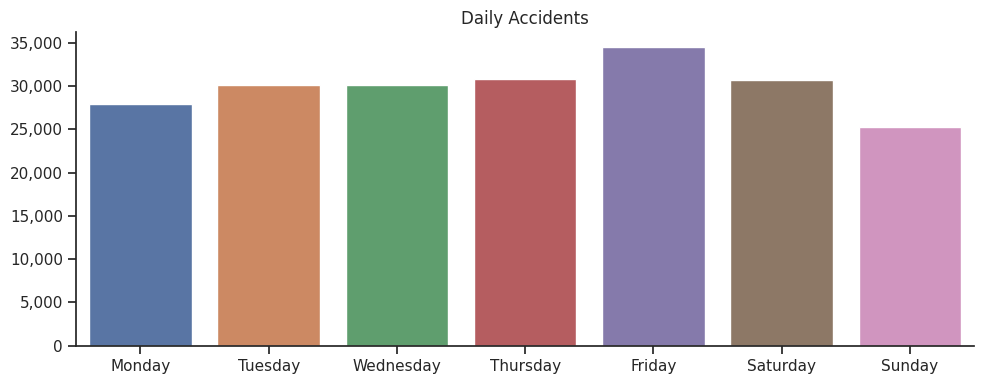

In [58]:
fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=sorted_daily_accidents, x='crash_day_of_week_name', y='count')
ax.set_title('Daily Accidents')
ax.set_ylabel('')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()

We can see that the number of accidents per day ranges from approximately 25,000 to 34,000, with Friday having the highest number of accidents. This could be attributed to increased traffic volumes as more people are on the road, finishing work for the week and heading to weekend getaways. Higher traffic volumes create more opportunities for accidents. Additionally, as it’s the end of the working week, fatigue from long hours may affect drivers reaction times. Fridays are also a popular day for socialising and people may be more likely to consume alcohol, which can impair their driving abilities.

## Step 5. Monthly Accidents 

Now let's see the number of accidents per month. We want to apply the same approach as we did for daily accidents, but this time sort the data by month.

In [59]:
monthly_accidents = df['crash_month_name'].value_counts().reset_index()
monthly_accidents_merge = pd.merge(monthly_accidents, df[['crash_month_name', 'crash_month']].drop_duplicates())
sorted_monthly_accidents = monthly_accidents_merge.sort_values(by='crash_month')
sorted_monthly_accidents.drop(columns=['crash_month'], inplace=True)

sorted_monthly_accidents

,crash_month_name,count
8,January,16606
11,February,14621
9,March,15265
10,April,15096
7,May,17432
5,June,17851
6,July,17834
3,August,18350
1,September,19018
0,October,20089


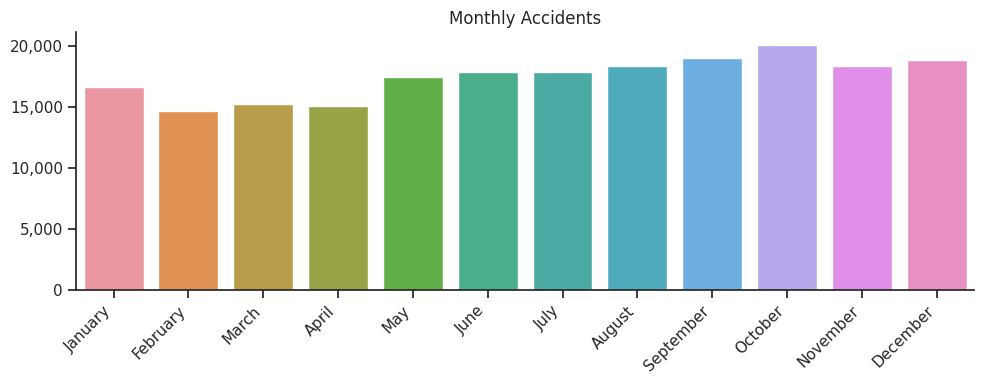

In [60]:
fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=sorted_monthly_accidents, x='crash_month_name', y='count')
ax.set_title('Monthly Accidents')
ax.set_ylabel('')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

We can see that the number of accidents per month ranges from approximately 14,000 to 20,000, with October having the highest number of accidents. This could be attributed to daylight savings time resulting in earlier sunsets. Reduced daylight hours, especially during rush hour, can increase the likelihood of accidents due to lower visibility and more drivers on the road in the dark. Halloween could also be a contributing factor. On October 31st, there is typically an increase in foot traffic. This heightened pedestrian activity could lead to a higher number of accidents on this day.

## Step 6. Hourly Accidents

Now let's see the number of accidents per hour using value_counts. To sort the results by the hour, we can use sort_index.

In [61]:
hourly_accidents = df['crash_hour'].value_counts().sort_index()
hourly_accidents

crash_hour
0      4487
1      3729
2      3080
3      2364
4      2104
5      2819
6      4772
7      9405
8     11381
9      9300
10     8990
11    10052
12    11726
13    11949
14    13349
15    15894
16    16025
17    16097
18    13431
19     9683
20     8219
21     7472
22     7035
23     5943
Name: count, dtype: int64

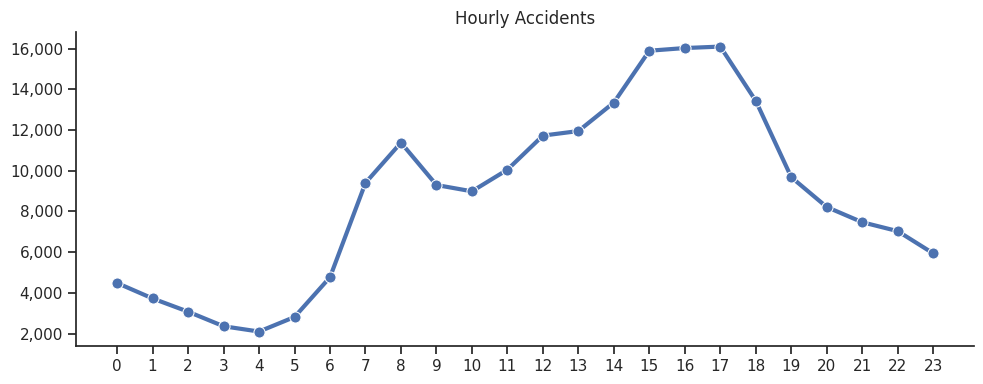

In [294]:
fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style='ticks')
sns.despine()
sns.lineplot(data=hourly_accidents, x=hourly_accidents.index, y=hourly_accidents, linewidth=3, marker='o', markersize=8)
ax.set_title('Hourly Accidents')
ax.set_ylabel('')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.set_xticks(hourly_accidents.index)

plt.tight_layout()

We can see that the early morning hours,from 12AM to 6AM, see fewer accidents compared to the rest of the day. The number of accidents begins to increase during the morning rush hour, between 6AM and 9AM. It reaches its highest peak during the evening rush hour, from 3PM to 6PM, with around 16,000 accidents recorded. Afterward, the number of accidents starts to decline as the day progresses into the later hours.

## Step 7. Daily Accidents in the Top 3 Highest Accident Months

Now let's see the number of accidents per day during the top three months with the highest number of accidents. We already have the total number of accidents per month, which we can use to identify the top 3 months. We'll group the data by month and day of the week, including the day of the week number, so we can sort the data accordingly when plotting the graph. We will use a pivot table to aggregate the data, setting the day of the week name and day of the week integer as indexes. After sorting the data by the day of the week integer, we will drop the index.

<Figure size 600x400 with 0 Axes>

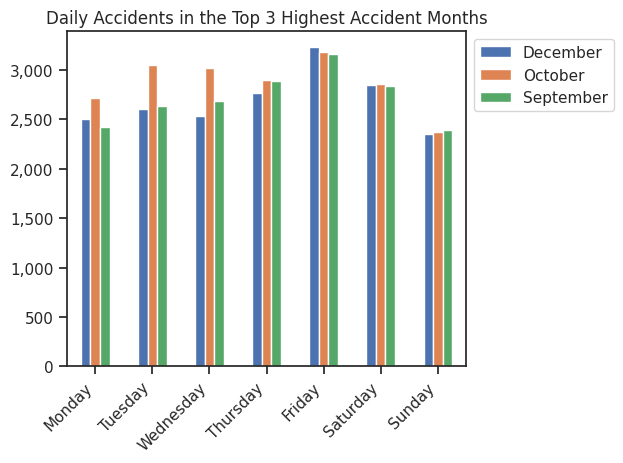

In [313]:
accidents_by_day_month = df.groupby(['crash_month_name', 'crash_day_of_week_name', 'crash_day_of_week']).size().reset_index(name='count')
top_3_monthly_accidents = accidents_by_day_month[accidents_by_day_month['crash_month_name'].isin(monthly_accidents.head(3)['crash_month_name'])]

pivot = top_3_monthly_accidents.pivot_table(index=['crash_day_of_week_name', 'crash_day_of_week'], columns=['crash_month_name'], values='count')
pivot.sort_values(by='crash_day_of_week', inplace=True)
pivot.reset_index(level='crash_day_of_week', drop=True, inplace=True)

plt.figure(figsize=(6, 4))
pivot.plot(kind='bar')
plt.title('Daily Accidents in the Top 3 Highest Accident Months', fontsize=12)
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

We can see that the top 3 months are December, October and September. Friday has the highest number of accidents across all three months, with Sunday having the least number of accidents. This could be due to lower traffic volume and fewer commuters compared to weekdays. The number of accidents remains consistent from Thursday-Sunday across the months. However, from Monday-Wednesday, the number of accidents peaks in October.